# 1. 라이브러리 불러오기

In [1]:
# 데이터 분석을 위해 pandas 불러오기
import pandas as pd

In [2]:
# colab을 사용한다면 런타임이 초기화 될 때마다 다시 설치해주어야 한다
# 로컬 컴퓨터에 설치 했다면 이전에 설치된 라이브러리를 사용하면 됨
# !pip install -U finance-datareader

In [3]:
# FinanceDataReader 를 fdr 별칭으로 가져오기
import FinanceDataReader as fdr

# 2. 개별 정목의 일별 시세 수집
* 종목 코드로 수집이 가능하다
* 종목명을 찾아서 일별 시세를 수집해 주는 함수를 만들어 볼 예정임

In [4]:
# 삼성전자, 2017년~현재 일별 시세 받아오기
# 삼성전자의 종목 번호 = '005930'
# volume - 거래량, change - 변화량

df = fdr.DataReader('005930', "2017","2021")
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665
2017-01-03,36280,36620,36020,36480,147153,0.010526
2017-01-04,36500,36520,36100,36160,159435,-0.008772
2017-01-05,36060,36060,35540,35560,219349,-0.016593
2017-01-06,36180,36440,36040,36200,177619,0.017998


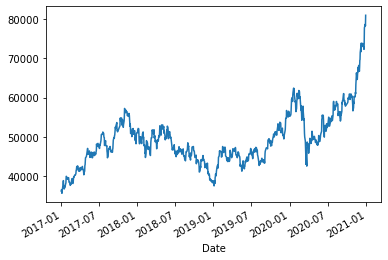

In [5]:
df["Close"].plot()

# 3. 상장 종목 목록 가져오기

In [6]:
# 저장해둔 krx csv 가져오기
df_krx = pd.read_csv("krx.csv")
df_krx.shape
df_krx

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
2607,000547,KOSPI,흥국화재2우B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2608,000545,KOSPI,흥국화재우,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2609,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
2610,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호, 염두성 (각자대표)",http://www.heerim.com,서울특별시


# 4. 상장종목 목록 사용하기
* 종목명과 심볼을 찾기 위해 상장 종목 목록을 사용합니다

In [7]:
# DataFrame에 어떤 데이터가 들어있는 지 head()로 일부 데이터만 가져와 봅니다
df_krx[["Symbol","Name"]].head()

,Symbol,Name
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템


In [8]:
# 빅히트 종목찾기
# df_krx의  Name column에서 "빅히트"에 해당하는 row를 전부 가져오는데 Name column 만 가져옴
# list 형태로 index 번호는 빼고 ['빅히트'] 만 가져오게 되고[0]을 통해 list에 있는 string만 가져오게됨
# 빅히트 (series) -> ['빅히트'](list) -> ' 빅히트' (string)

item_name = "빅히트"

# df_krx[df_krx["Name"] == "빅히트"]["Symbol"]
df_krx.loc[df_krx["Name"] == item_name, "Symbol"].tolist()[0]

'352820'

In [9]:
# '히트' 라는 상장사가 있는가?
# df_krx.loc[df_krx["Name"] == "히트", "Symbol"].tolist()[0]

IndexError: list index out of range

# 5. 종목명으로 종목 코드를 받아오는 함수 만들기

In [10]:
# 종목명으로 종목코드 받아오는 함수 만들기
# df_krx의 Name column에서 같은 값이 있으면 
# row의 Symbol column의 값을 list로 name_list에 저장하기
# item_code_by_item_name함수를 만듭니다

def item_code_by_item_name(item_name):
    """
    종목명을 받아 종목 코드를 찾아 반환하는 함수
    """
    
    item_code_list = df_krx.loc[df_krx["Name"] == item_name, "Symbol"].tolist()
    if len(item_code_list) > 0:
        item_code = item_code_list[0]
        return item_code
    else:
        return False

In [11]:
item_code_by_item_name("빅 히트")

False

In [12]:
# 네이버로 등록된 상장사는 없습니다
# 잘못 입력된 텍스트에 대해 예외처이를 하는지 확인합니다.

item_code_by_item_name("NAVER")

'035420'

In [13]:
# 삼성전자
item_code_by_item_name("삼성전자")

'005930'

In [14]:
# 셀트리온
item_code_by_item_name("셀트리온")

'068270'

In [15]:
# 카카오게임즈
item_code_by_item_name("카카오게임즈")

'293490'

In [16]:
fdr.DataReader(item_code_by_item_name("삼성전자"))

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-02-13,1004,1081,1004,1049,323720,NaN
1997-02-14,1058,1084,1049,1058,187570,0.008580
1997-02-15,1067,1076,1036,1041,77700,-0.016068
1997-02-17,1031,1036,992,996,171950,-0.043228
1997-02-18,996,1028,987,1012,164930,0.016064
...,...,...,...,...,...,...
2021-01-19,84500,88000,83600,87000,39895044,0.023529
2021-01-20,89000,89000,86500,87200,25211127,0.002299
2021-01-21,87500,88600,86500,88100,25318011,0.010321


## 6. 종목명으로 일별 시세를 받아오는 함수 만들기

In [24]:
# item_code_by_item_name : 종목명으로 종목 번호 가져오기
# find_item_list : 종목번호로 해당연도 데이터 가져오기
# find_item_list는 year 값이 없으면 기본으로 2020 데이터를 선택

def find_item_list(item_name, year = 2020):
    """
    종목명을 넘겨주면 일별 시세를 반환하는 함수
    내부에서 종목명으로 종목코드를 반환하는 함수 (item_code_by_item_name)로 종목의 시세를 수집합니다.
    """
    item_code = item_code_by_item_name(item_name)
    if item_code:
        df_day = fdr.DataReader(item_code, str(year))
        return df_day
    else:
        return False

In [32]:
find_item_list("NAVER", 2017)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,155821,157623,155220,155621,30777,0.002583
2017-01-03,155620,155620,153617,153618,51766,-0.012871
2017-01-04,155220,162230,154419,162230,120359,0.056061
2017-01-05,162230,162230,158424,158425,68724,-0.023454
2017-01-06,158424,160427,157423,160027,50269,0.010112
...,...,...,...,...,...,...
2021-01-19,303500,310500,299500,308000,880238,0.024958
2021-01-20,313500,313500,302000,308000,885472,0.000000
2021-01-21,316500,326000,316000,322500,1941446,0.047078


### 6.1 종목명으로 일별시세를 잘 가져오는지 확인하기

In [35]:
# LG화학의 데이터를 가져옵니다.
find_item_list("LG화학")

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,321000,321000,313500,314000,139496,-0.011024
2020-01-03,317000,318500,310500,311000,165030,-0.009554
2020-01-06,308000,311000,306500,307000,138154,-0.012862
2020-01-07,306000,313500,305000,311000,133788,0.013029
2020-01-08,306000,307000,301500,302000,225471,-0.028939
...,...,...,...,...,...,...
2021-01-19,983000,1003000,970000,997000,386045,0.034232
2021-01-20,1004000,1010000,983000,1000000,360937,0.003009
2021-01-21,1011000,1019000,988000,988000,364628,-0.012000


In [36]:
# 빅히트의 데이터를 가져옵니다
# stock_daily 변수에 담습니다
stock_daily = find_item_list("빅히트")
stock_daily

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-10-15,270000,351000,253500,258000,6557212,NaN
2020-10-16,253000,253000,199000,200500,4504395,-0.222868
2020-10-19,198500,202500,187000,189000,1977996,-0.057357
2020-10-20,190000,193500,176000,182500,1811616,-0.034392
2020-10-21,180500,185500,177000,179000,1658643,-0.019178
...,...,...,...,...,...,...
2021-01-19,168000,174500,167000,173500,459733,0.048338
2021-01-20,174000,177000,169000,176000,423998,0.014409
2021-01-21,178000,178000,173000,173000,242491,-0.017045


## 7. 개별 종목 시세 시각화

### 7.1 pandas의 plot으로 시각화 하기

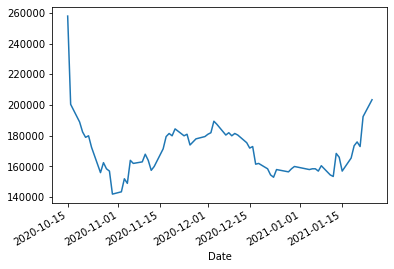

In [37]:
# stock_daily 변수에 할당된 수집된 데이터의 종가 그래프를 그립니다
stock_daily["Close"].plot()

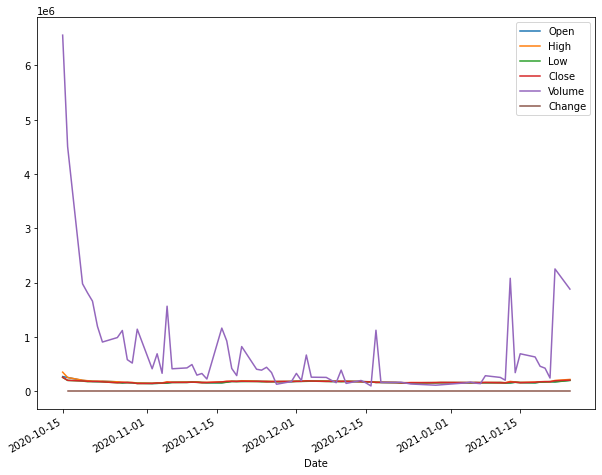

In [44]:
# 전체 데이터 프레임을 plot()으로 시각화 하면 수치 데이터 전체를 선 그래프로 그립니다.
stock_daily.plot(figsize = (10,8))

### 7.2 서브 플롯 그리기

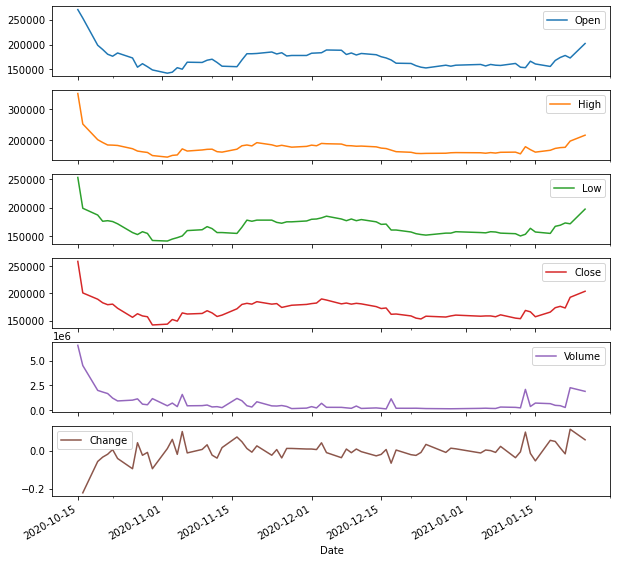

In [45]:
# 수립한 종목의 선그래프를 pandas로 그립니다
# 스케일이 다르기 때문에 subplots를 사용해 그려봅니다
g = stock_daily.plot(subplots= True, figsize = (10,10))

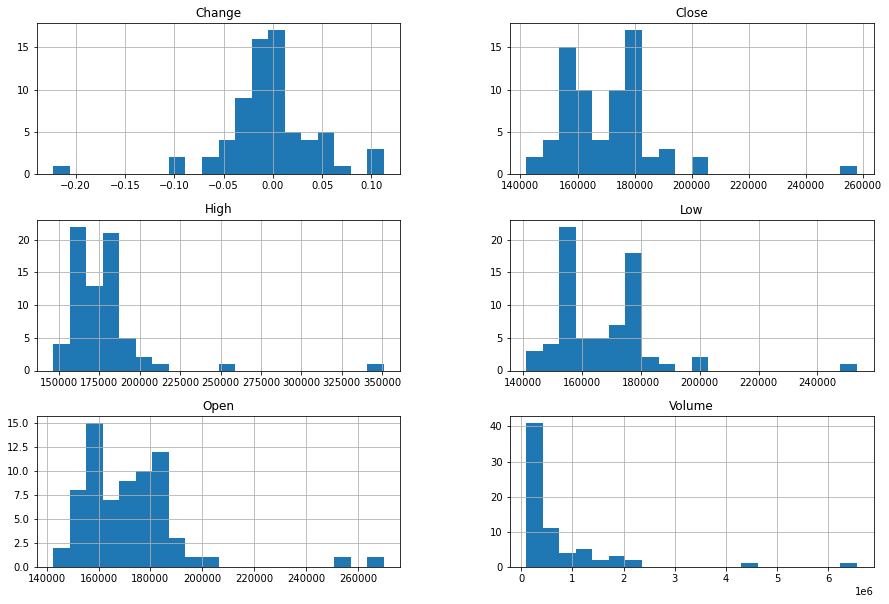

In [54]:
# 히스토그램 그리기
h = stock_daily.hist(figsize = (15,10), bins = 20)

### 7.3 2축 그래프 그리기

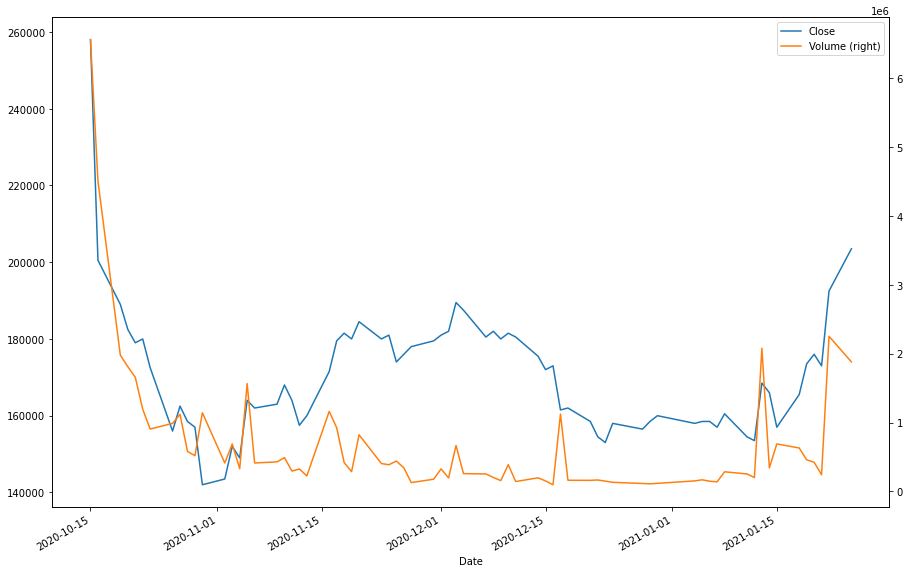

In [58]:
# secondary_y 옵션을 통한 종가와 거래량에 대한 2축 그래프 그리기
stock_daily[["Close", "Volume"]].plot(secondary_y = "Volume", figsize = (15,10))

* 참고 : E notation (과학적 기수법)

In [60]:
format(1e6 , ",")

'1,000,000.0'

In [63]:
format(10 ** 6, ",")

'1,000,000'

In [64]:
stock_daily.describe()

,Open,High,Low,Close,Volume,Change
count,70.000000,70.000000,70.000000,70.000000,7.000000e+01,69.000000
mean,171835.714286,177192.857143,166857.142857,170707.142857,7.038167e+05,-0.002268
std,20339.994412,26691.242234,16521.427206,16844.233705,1.006530e+06,0.047492
min,142500.000000,146500.000000,141000.000000,142000.000000,9.701000e+04,-0.222868
25%,158125.000000,162125.000000,155125.000000,158500.000000,1.822152e+05,-0.021605
50%,169000.000000,173750.000000,164500.000000,170000.000000,3.656430e+05,0.000000
75%,181375.000000,183375.000000,176375.000000,180000.000000,7.890452e+05,0.012780
max,270000.000000,351000.000000,253500.000000,258000.000000,6.557212e+06,0.112717
